# Fitting_Code tutorial
## OBSERVAÇÃO

O arquivo *Fitting_Code.py* deve estar localizado na mesma pasta deste notebook para rodar certinho
## Instalação necessária: LMFIT

Para rodar este notebook, a biblioteca lmfit deve ser instalada:

    conda install -c conda-forge lmfit

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import lmfit


np.random.seed(42) #criando seed de valores aleatórios para que não mudem

## Criando dados com ruído

Aqui serão criados arrays de dados correspondentes a uma gaussiana com presença de ruído

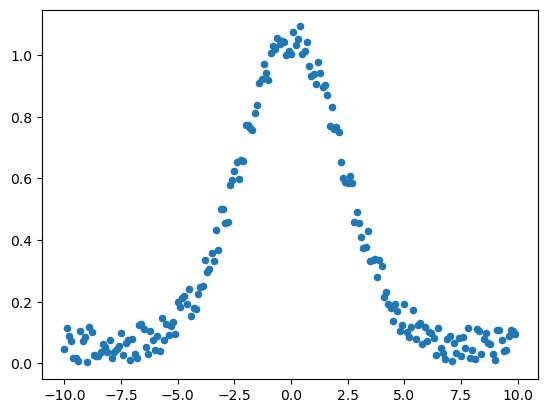

In [2]:
x = np.arange(-10,10,0.1)
y = np.exp((-x**2)/10)

## Ruído
for i in range(len(y)):
    y[i] = y[i] + 0.12*np.random.random()

    
## Plot dos dados
plt.scatter(x,y,s=20)

## Curve Fitting

Será definida a função que será ajustada nesses dados.

Os parâmetros 'a' e 'b' serão encontrados a partir daí

In [3]:
#Definindo a função da gaussiana

def func(x,a,b):
    return np.exp((-x**2)/a) + b 

#Importando a classe Fitting
from pyBini.Fitting_Code import Fitting

fit = Fitting(func) #escolhendo a função
a= dict(value=10, min=9, max=11)
fit.fit(x,y, a=a, b=1) #realizando o fitting

#os valores dos parâmetros a e b são os chutes iniciais para que
#o algoritmo consiga encontrá-los
#podem ser definidos como float ou como dict (como mostrado, incluindo
#valores de mínimo e máximo)

name,value,standard error,relative error,initial value,min,max,vary
a,10.0045757,0.18956730,(1.89%),10,9.00000000,11.0000000,True
b,0.05801665,0.00365282,(6.30%),1.0,-inf,inf,True


### Plot do fitting

O gráfico obtido pode ser modificado pelo usuário, como será explicado a seguir

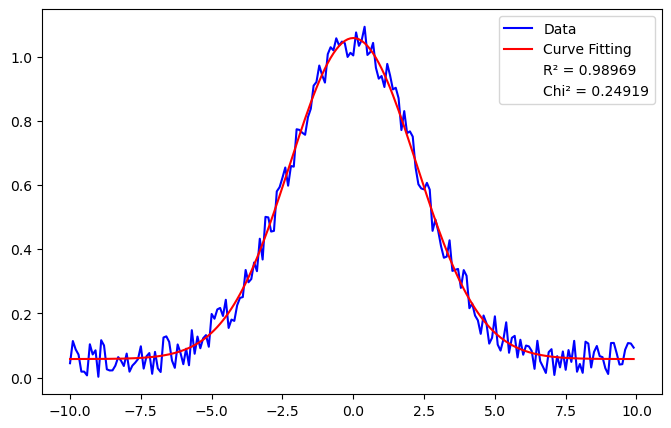

In [4]:
#aqui será mostrado o gráfico nas suas configurações default escritas na classe Fitting
#x e y são os únicos parâmetros obrigatórios
fit.plot(x,y)

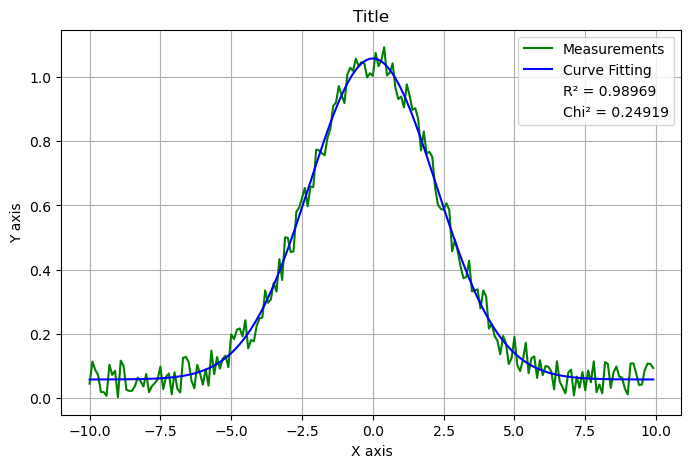

In [5]:
#Os demais parâmetros além de x e y servem para modificar
#os detalhes do plot. Por exemplo:
xlabel = 'X axis'
ylabel = 'Y axis'
title = 'Title'
data_label = 'Measurements'
color_data = 'green'
color_fitting = 'blue'
figsize = (8,5)
grid = True



fit.plot(x,y,xlabel,ylabel,title,data_label,color_data,color_fitting,figsize,grid)

### Scatter do fitting

Aqui será mostrado o gráfico ponto a ponto, diferentemente do caso anterior. Também pode ser modificado

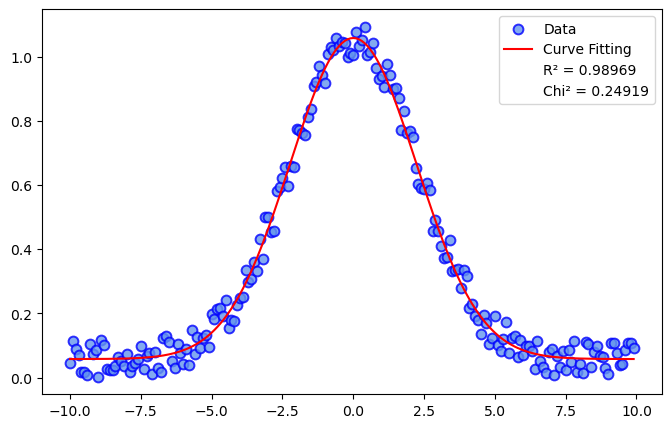

In [6]:
#aqui será mostrado o gráfico nas suas configurações default escritas na classe Fitting
#x e y são os únicos parâmetros obrigatórios
fit.scatter(x,y)

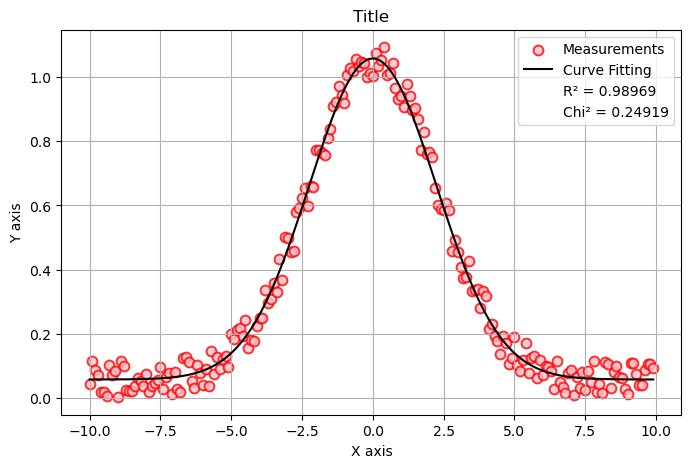

In [7]:
#Os demais parâmetros além de x e y servem para modificar
#os detalhes do plot. Por exemplo:
xerr = None
yerr = None
xlabel = 'X axis'
ylabel = 'Y axis'
title = 'Title'
data_label = 'Measurements'
edgecolor_data = 'red'
facecolor_data ='pink'
color_fitting = 'black'
figsize = (8,5)
grid = True

fit.scatter(x,y,xerr,yerr,xlabel,ylabel,title,data_label,edgecolor_data,facecolor_data,color_fitting,figsize,grid)

## Obtendo os resultados

Aqui pode-se obter os valores dos parâmetros calculados, seus erros e grandezas estatísticas associadas a eles

In [8]:
#todas as variáveis encontradas e seus erros
fit.get_params()

name,value,standard error,relative error,initial value,min,max,vary
a,10.0045757,0.18956730,(1.89%),10,9.00000000,11.0000000,True
b,0.05801665,0.00365282,(6.30%),1.0,-inf,inf,True


In [9]:
#valor do parâmetro 'a'
fit.get_params('a')

10.004575672824119

In [10]:
#valor do parâmetro 'b'
fit.get_params('b')

0.05801664974562347

In [11]:
#resultados e estatísicas
fit.result()

In [12]:
#Concordância do valor de 'a' com o valor esperado ('a' deveria ser 10)
fit.conc(fit.get_params('a'),10)

0.9995424327175881